# 2. 강화학습 기초1 : MDP 와 벨만 방정식

## MDP
앞서 말했듯 순차적 행동 결정 문제는 MDP로 정의할 수 있습니다. MDP는 순차적 행동 결정 문제를 수학적으로 표현합니다. MDP는 상태, 행동, 보상 함수, 상태 변환 확률, 감가율 로 구성되어 있습니다.

강화학습에서는 사용자가 문제를 정의해야 합니다. 문제를 잘못 정의하면 에이전트가 학습을 못 할 수도 있습니다. 
아래에서는 간단한 예시인 그리드 월드라는 예제를 통해 설명하겠습니다.

### MDP의 구성요소 1 : 상태
S는 에이전트가 관찰 가능한 상태의 집합입니다. 에이전트 자신의 상황에 대한 관찰입니다. 게임을 학습하기 위한 에이전트는 사용자가 상태를 정의해줘야 합니다.
그리드월드에서 에이전트가 학습할 때에는 상태 공간이 워낙 작으므로 상태의 정의 문제가 중요하지 않을 수도 있습니다. 하지만 방대하고 복잡한 상태 안에서 학습하는 에이전트를 구현할 때는 많이 고민해야 할 문제입니다.

그리드 월드에서 상태가 다섯 개 있다면 S = {(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x5,y5)}의 집합으로 표시할 수 있습니다.

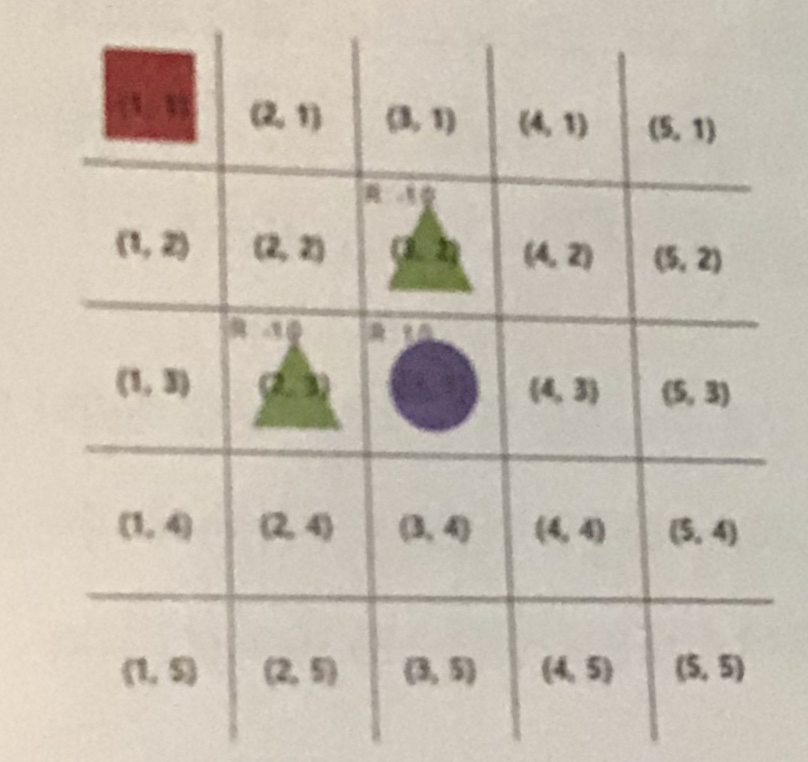

위의 그리드월드에서는 격자 상의 위치가 상태가 됩니다. 에이전트가 (1,1)에 있다면 에이전트의 상태는 (1,1)인 셈입니다.

그리드월드의 상태를 집합으로 나타낸다면 S = {(1,1),(1,2),(1,3),~~~ ,(5,5)}처럼 표시할 수 있습니다.


시간 t일 때 상태를 S(t)라고 표현합니다. 이때 상태 S는 정해져있지 않은데 집합 안에서 뽑을 때마다 달라질 수 있는 것을 "확률변수"라고 합니다.
시간 t일 때 에이전트가 있을 에이전트의 상태 또한 때에 따라 달라지기 때문에 상태를 확률변수로 보는 것입니다.

시간 t에서의 상태 S(t)가 어떤 상태 s다 를 표현할 때 수식을 S(t)=s로 정의하겠습니다.

### MDP의 구성요소 1 : 행동

에이전트가 상태 S(t)에서 할 수 있는 행동의 집합은 A입니다. 마찬가지로 시간 t에 에이전트가 취한 행동 a를 수식으로 표현할 수 있습니다.\n

A(t) = a

예시로 든 그리드 월드에서 에이전트가 할 수 있는 행동은 위아래양옆으로 이동하는 것입니다. 따라서 집합을 다음과 같이 정의할 수 있습니다.

A = {UP,DOWN, LEFT, RIGHT}

만약 시간 t에서 상태 S(t)가 (3,1)이고 A(t)가 RIGHT라면 다음 시간 상태 S(t+1)은 (4,1)이 됩니다.

### MDP의 구성요소 2 : 보상함수

보상은 에이전틑가 학습할 수 있는 유일한 정보입니다. 수식을 먼저 보시고 내용을 설명하겠습니다.

R(s,t) = E[R(t+! | S(t)=s, A(t)=a]

보상함수는 시간 t일때 상태가 S(t)=s이고, 그 상태에서 행동 A(t) = a를 했을 경우 받을 보상에 대한 기댓값 E입니다.(Expectation)

주사위의 예를 들면 주사위를 던졌을 때 나올 수 있는 기댓값이란 다음과 같습니다.
1*1/6 + 2*1/6 + 3*1/6 + 4*1/6 + 5*1/6 + 6*1/6 = 21/6 = 3.5
주사위 하나를 던졌을 때, 확률에 따라 나올 수 있는 기대값이 3.5인 것입니다.
보상 또한 기댓값이어서 상태 s에서 행동 a를 했을 경우에 받을 것이라 예상되는 값인것입니다.

보상함수를 기댓값으로 표현하는 이유는 다음과 같습니다. 에이전트에게 보상을 주는것은 환경이고, 환경에 따라서 같은 상탵에서 같은 행동을 취하더라도 다른 보상을 줄 수 도 있습니다. 따라서 이 모든 확률을 고려하여 보상홤수를 기댓값으로 표현하는 것입니다.

보상함수에서 유의해야 할 점은 행동한 것은 t에서이지만 보상을 받는 것은 t+!이라는 것입니다. 이 이유는 에이전트는 보상에 대해 모르고 환경이 에이전트에게 보상을 알려주는 것이기 때문입니다. 따라서 에이전트가 받는 보상을 R(t+!)이라고 표현합니다.

위의 예시에서 삼각형의 경우 -1을, 동그라미의 경우 +!을 보상합니다. 에이전트는 환경으로부터 하나의 시간 단위가 지난 다음에 보상을 받습니다. 이 시간 단위를 타임스탭(time step)이라고 합니다.

파란색 동그라미의 주위에서 파란색 동그라미로 가는 행동을 에이전트가 했다고 가정했을 때 에이전트는 +1의 보상을 다음 타임스탭에 받을 것입니다.

### MDP의 구성요소 3 : 상태변환 확률

위의 상태에 대한 설명에서 마지막 예시를 보았을 때 예상치 못한 요소로 (4,1)에 도달하지 못할 수도 있습니다. 이러한 상황을 고려해주는 것이 상태 변환 확률입니다.

에이전트가 어떤 상태에서 어떤 행동을 취한다면 에이전트의 상태는 변할 것입니다. 하지만 어떤 요소로 인해 다른 상태에 도달할 수도 있습니다.
이처럼 상태 변화에는 확률적인 요인이 들어갑니다. 그래서 이를 수치적으로 표현한 것이 상태 변환 확률입니다.

P(a,ss) = P[S(t+!) = s2 | S(t)=s1, A(t)=a]

상태 s1에서 행동 a를 했을 때 다른 상태s2에 도달할 확률입니다. 이 값은 마찬가지로 에이전트가 미리 알지 못하는 값으로, 환경의 일부입니다. 그래서 상태 변환 확률을 환경의 모델이라고 부릅니다. 환경은 에이전트가 행동을 취하면 상태 변환 확률을 통해 다음에 에이전트가 갈 상태를 알려줍니다.

### MDP의 구성요소 4 : 감가율

에이전트가 항상 현재에 판단을 내리기 때문에 현재에 가까운 보상일수록 더 큰 가치를 가집니다 보상의 크기를 100이라고 했을 때 현재 시각에 보상을 받을 때는 에이전트는 100의 크기 그대로 받아들입니다. 하지만 현재로부터 일정 시간이 지나서 보상 100을 받는다면 그것을 100으로 받아들이지 않습니다. 에이전트는 그 보상이 얼마나 시간이 지나서 받는지를 고려해서 감가시켜 현재의 가치로 따집니다.

감가율은 0과 1 사이의 값입니다. 시간에 따른 감가율을 보상에 곱한 후 에이전트가 받아들입니다.

### MDP의 구성요소 5 : 정책

정책은 모든 상태에서 에이전트가 할 행동입니다. 정책은 각 상태에서 단 하나의 행동만을 나타낼 수 도 있고 확률적으로 a1=10%, a2 = 90%처럼 나타낼 수도 있습니다.
에이전트가 강화학습을 통해 목표로 삼아야 할 것은 수많은 정책 중 최적 정책입니다. 최적 정책은 각 상태에서 단 하나만의 행동만을 선택합니다. 하지만 에이전트가 학습하고 있을 때에는 확률적으로 여러 개의 행동을 선택할 수 있어야 합니다. 

## 가치함수

에이전트는 MDP를 통해 최적 정책을 찾습니다. 하지만 에이전트는 아직 받지 않은 많은 보상들을 고려해야 합니다 이 때 나오는 개념이 가치함수입니다.
현재시간 t로부터 에이전트가 행동을 하면서 받을 보상들을 합한다면 다음과 같습니다.

R(t+1) + R(t+2) + ...

위 수식의 경우 에이전트가 시간마다 보상을 받을 수도 있고 게임이 끝날 때 한 번에 받을 수도 있습니다. 따라서 에이전트는 단순히 보상의 합으로는 판단을 내리기가 어렵습니다. 따라서 좀 더 정확한 판단을 위해 감가율을 고려하는 것입니다. 감가율을 이용해 이 값들을 더하면 다음과 같습니다.

R(t+1) + 감가율 *R(t+2) + 감가율^2*R(t+3) + ... +감가율^k-1 * R(t+k) ...

이 값을 반환값 G(t)라고 합니다.
t가 1부터 5까지 진행했다면 다음과 같은 5개의 반환값이 생길 것입니다.


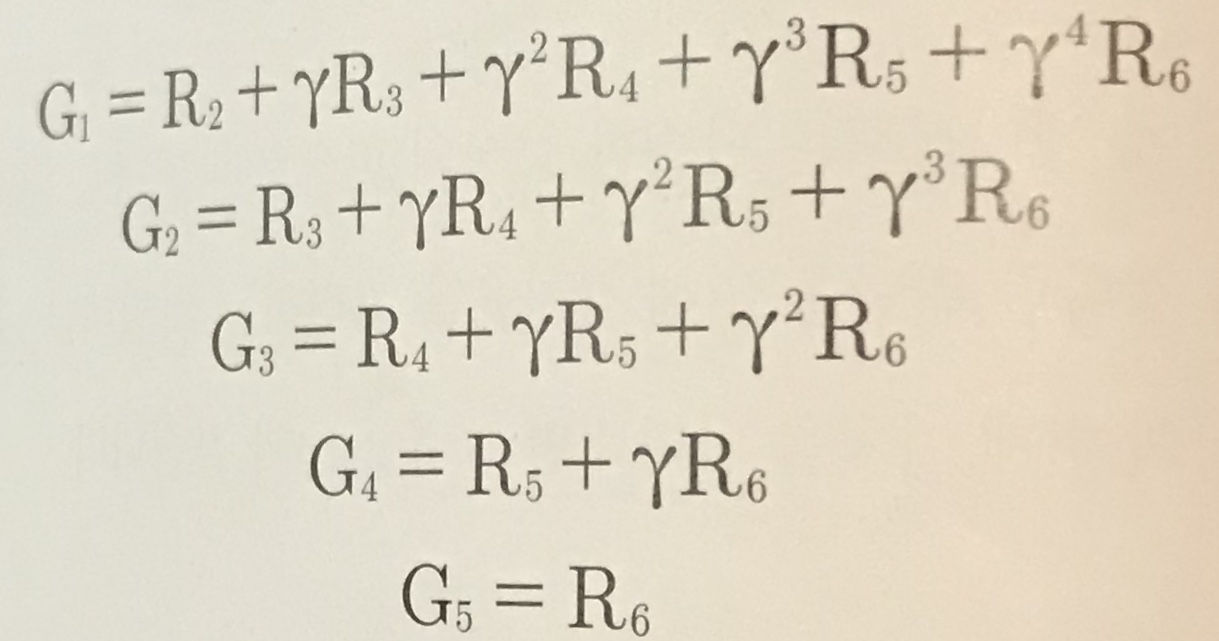

에이전트는 위의 값을 에피소드가 끝나야 알 수 있습니다. 하지만 에이전트는 현재의 정보를 토대로 행동해야 합니다. 따라서 얼마의 보상을 받을 것인지에 대한 기댓값을 고려해야 합니다. 그것이 바로 가치함수입니다.

각 타임스텝마다 받는 보상이 모두 확률적이고 반환값이 그 보상들의 합이므로 반환값은 확률변수입니다. 가치함수는 확률변수가 아니라 특정 양을 나타내는 기댓값이므로 소문자로 표현합니다. 에이전트가 갈 수 있는 상태들의 가치를 안다면, 그 중 가장 가치가 높은 상태를 선택할 수 있습니다.

물론 처음에는 기댓값이 정확하지 않습니다 하지만 과정을 여러 번 반복하면 결국 기댓값은 정확해집니다. 에이전트도 가치함수를 통해 어떤 상태가 좋을지 판단합니다.

가치함수를 수식에 대입해볼 수 있습니다.


감마(감가율)로 묶은 부분을 반환값의 형대로 반환하긴 했지만 이는 에이전트가 실제로 받은 보상이 아닙니다. 이는 예상한 값입니다. 이 부분을 앞으로 받을 보상에 대한 기댓값인 가치함수로 표현할 수 있습니다. 반환값을 가치함수로 바꿔서 표현하면 다음과 같습니다.

위의 수식은 가치함수를 정의할 때 정책을 고려하지 않습니다. 상태에서 상태로 넘어갈 때 에이전트는 무조건 행동을 해야 하고 각 상태에서 행동을 하는 것이 에이전트의 정책이기 때문입니다. ㄷ따라서 에이전트는 자신이 어떤 행동을 할지를 고려해서 앞으로 받을 보상을 계산합니다.

정책을 고려한 가치함수를 수식으로 표현하면 다음과 같습니다.


위의 수식을 벨만 기대 방정식이라고 합니다. 

## 큐함수

가치함수는 함수이기 때문에 입력과 출력이 무엇인지 알아야 합니다. 가치함수는 상태를 입력으로 받아 앞으로 받을 보상의 합을 출력으로 내놓습니다.
에이전트는 가치함수를 통해 어떤 상태에 있는 것이 얼마나 좋은지 알 수 있습니다. 어떤 상태에서 각 행동에 따라 따로 가치함수를 만들어서 그 정보를 얻어올 수 있다면 에이전트는 다음 상태의 가치함수를 따져보지 않아도 어떤 행동을 해야 할지 선택할 수 있습니다. 이처럼 어떤 상태에서 어떤 행동이 얼마나 좋은지 알려주는 함수를 행동 가치함수라고 합니다. 이를 간단하게 큐함수라고 할 수 있습니다.